In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,euclidean_distances
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Explore the data

In [2]:
data = pd.read_csv('Country-data.csv')

In [4]:
data.head(3)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090  
2        76.5       2.89  4460

<Axes: >

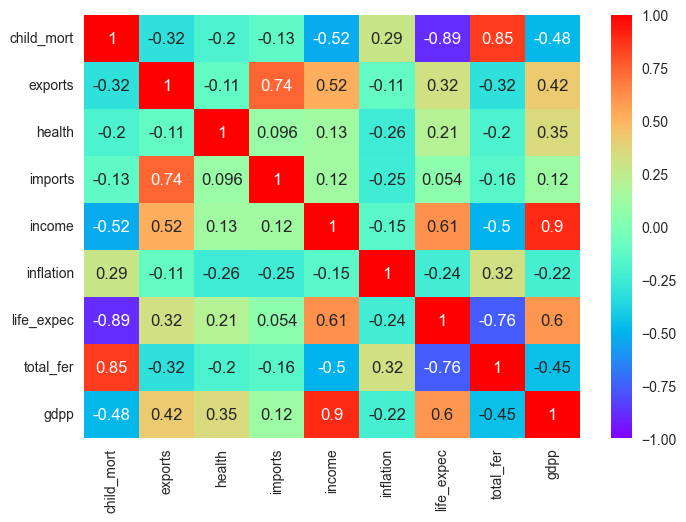

In [5]:
# Lets look for any significant relations in columns
sns.heatmap(data.corr(numeric_only=True),vmax=1,vmin=-1,cmap='rainbow',annot=True)

In [5]:
# Distribution of numeric columns

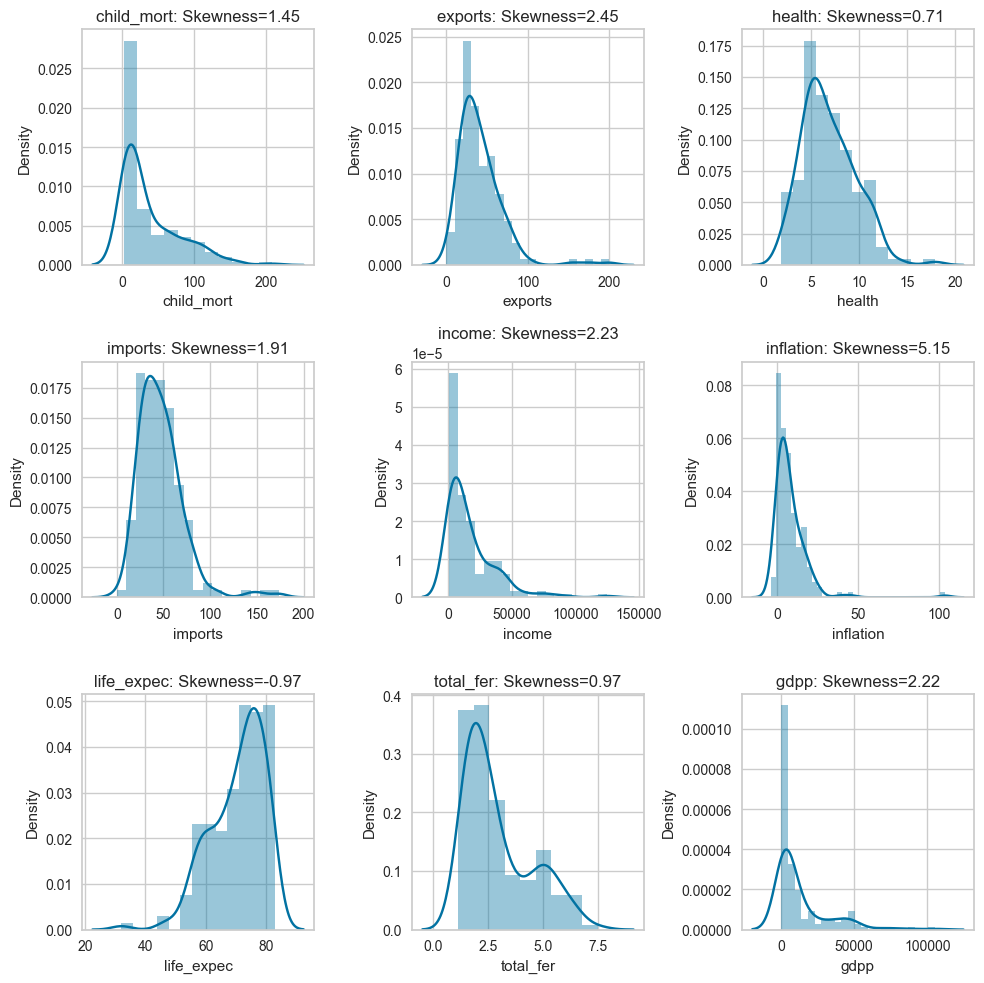

In [6]:
t=1
plt.figure(figsize=(10,10))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.distplot(data[i])
    plt.title(f'{i}: Skewness={round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [7]:
# Check for missing values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

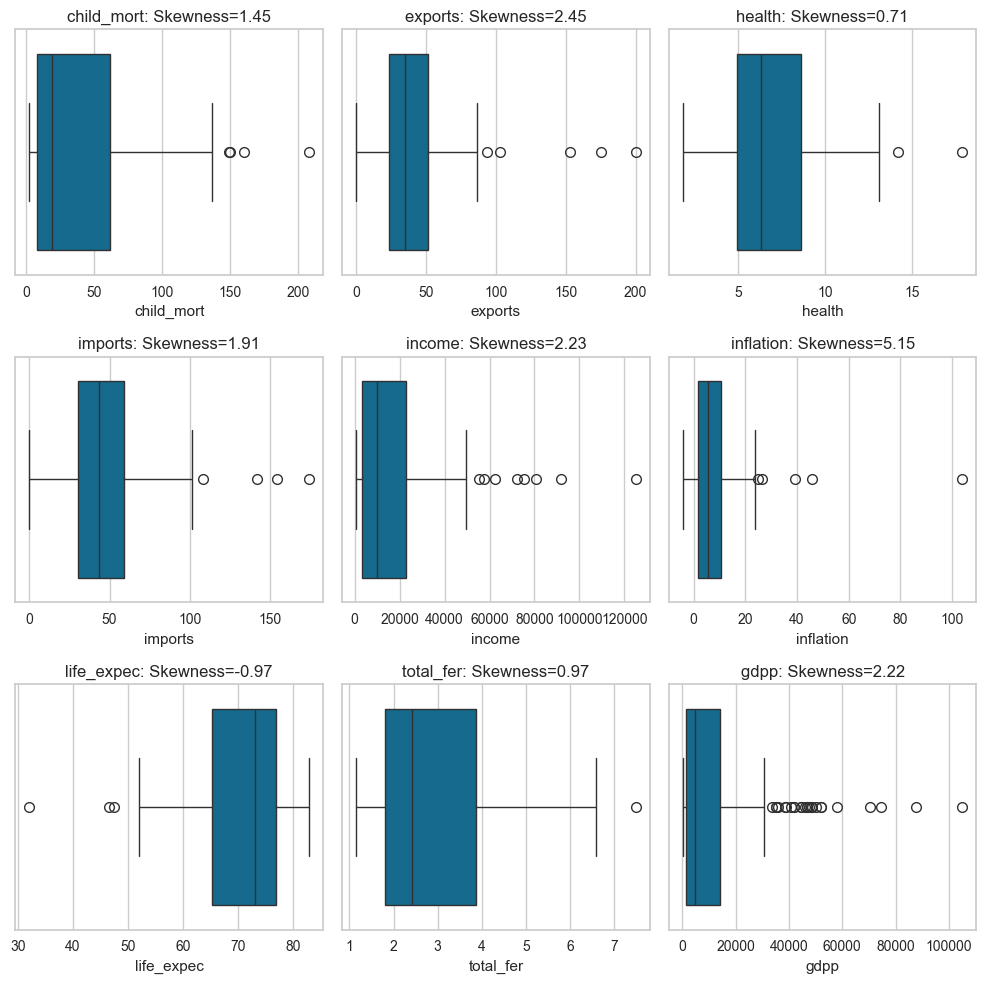

In [8]:
# Check for outliers
t=1
plt.figure(figsize=(10,10))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(data = data,x=i)
    plt.title(f'{i}: Skewness={round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [9]:
# As the data is already less, we will use percentile to cap the outliers

for i in data.select_dtypes(np.number).columns:
    ul = np.quantile(data[i],0.99)
    ll = np.quantile(data[i],0.01)
    data[i] = np.where(data[i]>ul,ul,data[i])
    data[i] = np.where(data[i]<ll,ll,data[i])

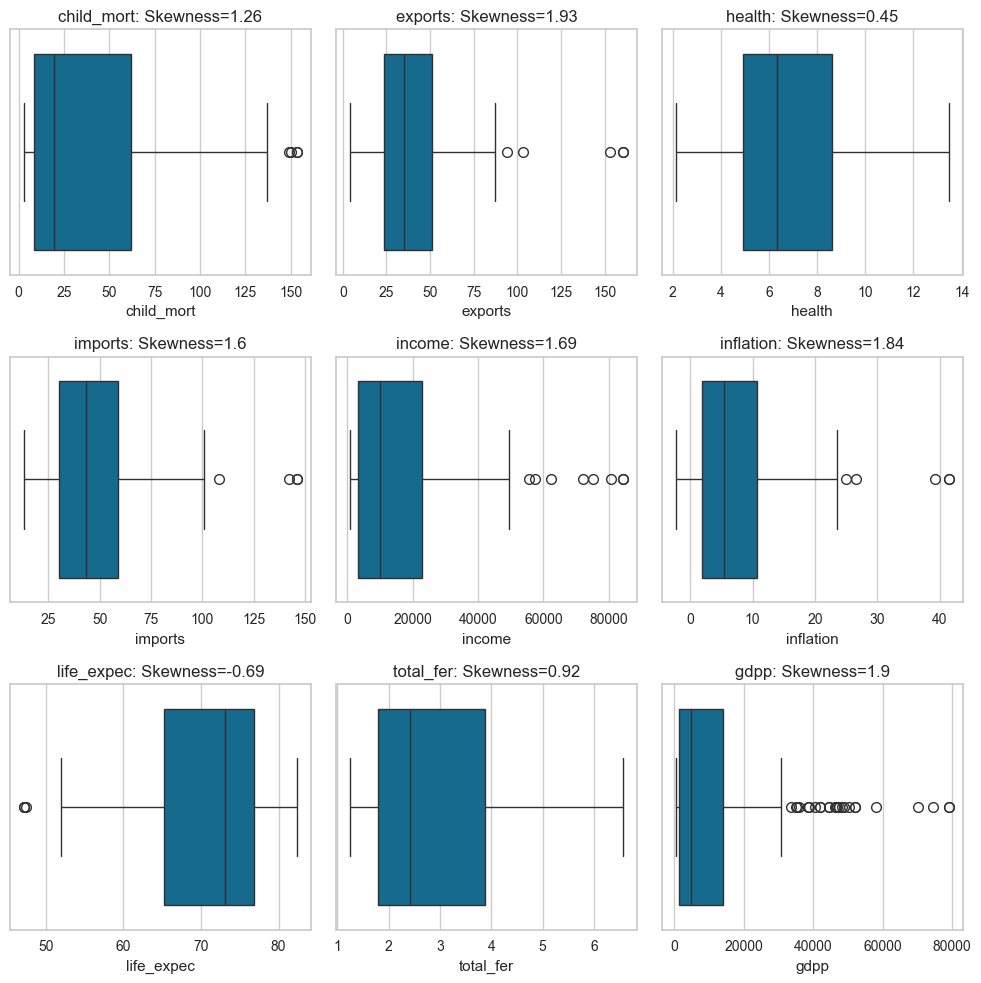

In [10]:
t=1
plt.figure(figsize=(10,10))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(data = data,x=i)
    plt.title(f'{i}: Skewness={round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [11]:
# Scale the data

In [11]:
data_ = data.drop(columns=['country'])

In [12]:
sc = StandardScaler()

In [13]:
data_s = sc.fit_transform(data_)
data_s = pd.DataFrame(data_s,columns=data_.columns)

In [14]:
data_s

child_mort   exports    health   imports    income  inflation  \
0      1.344012 -1.202883  0.300762 -0.080933 -0.851772   0.263649   
1     -0.547543 -0.500319 -0.090190  0.080055 -0.387025  -0.375251   
2     -0.272548 -0.094393 -0.993555 -0.668322 -0.221124   1.123260   
3      2.084186  0.838457 -1.494581 -0.167954 -0.612136   1.936405   
4     -0.709457  0.182730 -0.287564  0.528210  0.125202  -0.768917   
..          ...       ...       ...       ...       ...        ...   
162   -0.223717  0.225665 -0.583625  0.258447 -0.776921  -0.616614   
163   -0.534693 -0.480803 -0.712677 -1.268763 -0.020031   4.398816   
164   -0.375350  1.217062  0.019884  1.454978 -0.690898   0.606977   
165    0.472766 -0.422256 -0.610194 -0.537791 -0.691456   2.091290   
166    1.161539 -0.149036 -0.340703 -0.690077 -0.758487   0.852211   

     life_expec  total_fer      gdpp  
0     -1.693799   1.926928 -0.702314  
1      0.663053  -0.865911 -0.498775  
2      0.686504  -0.035427 -0.477483  
3     -1.236499   2.154642 -0.531000  
4      0.721681  -0.544433 -0.032079  
..          ...        ...       ...  
162   -0.896456   0.373118 -0.563226  
163    0.557522  -0.316720  0.042730  
164    0.287833  -0.664988 -0.658752  
165   -0.368803   1.156721 -0.658752  
166   -2.186275   1.645635 -0.650120  

[167 rows x 9 columns]

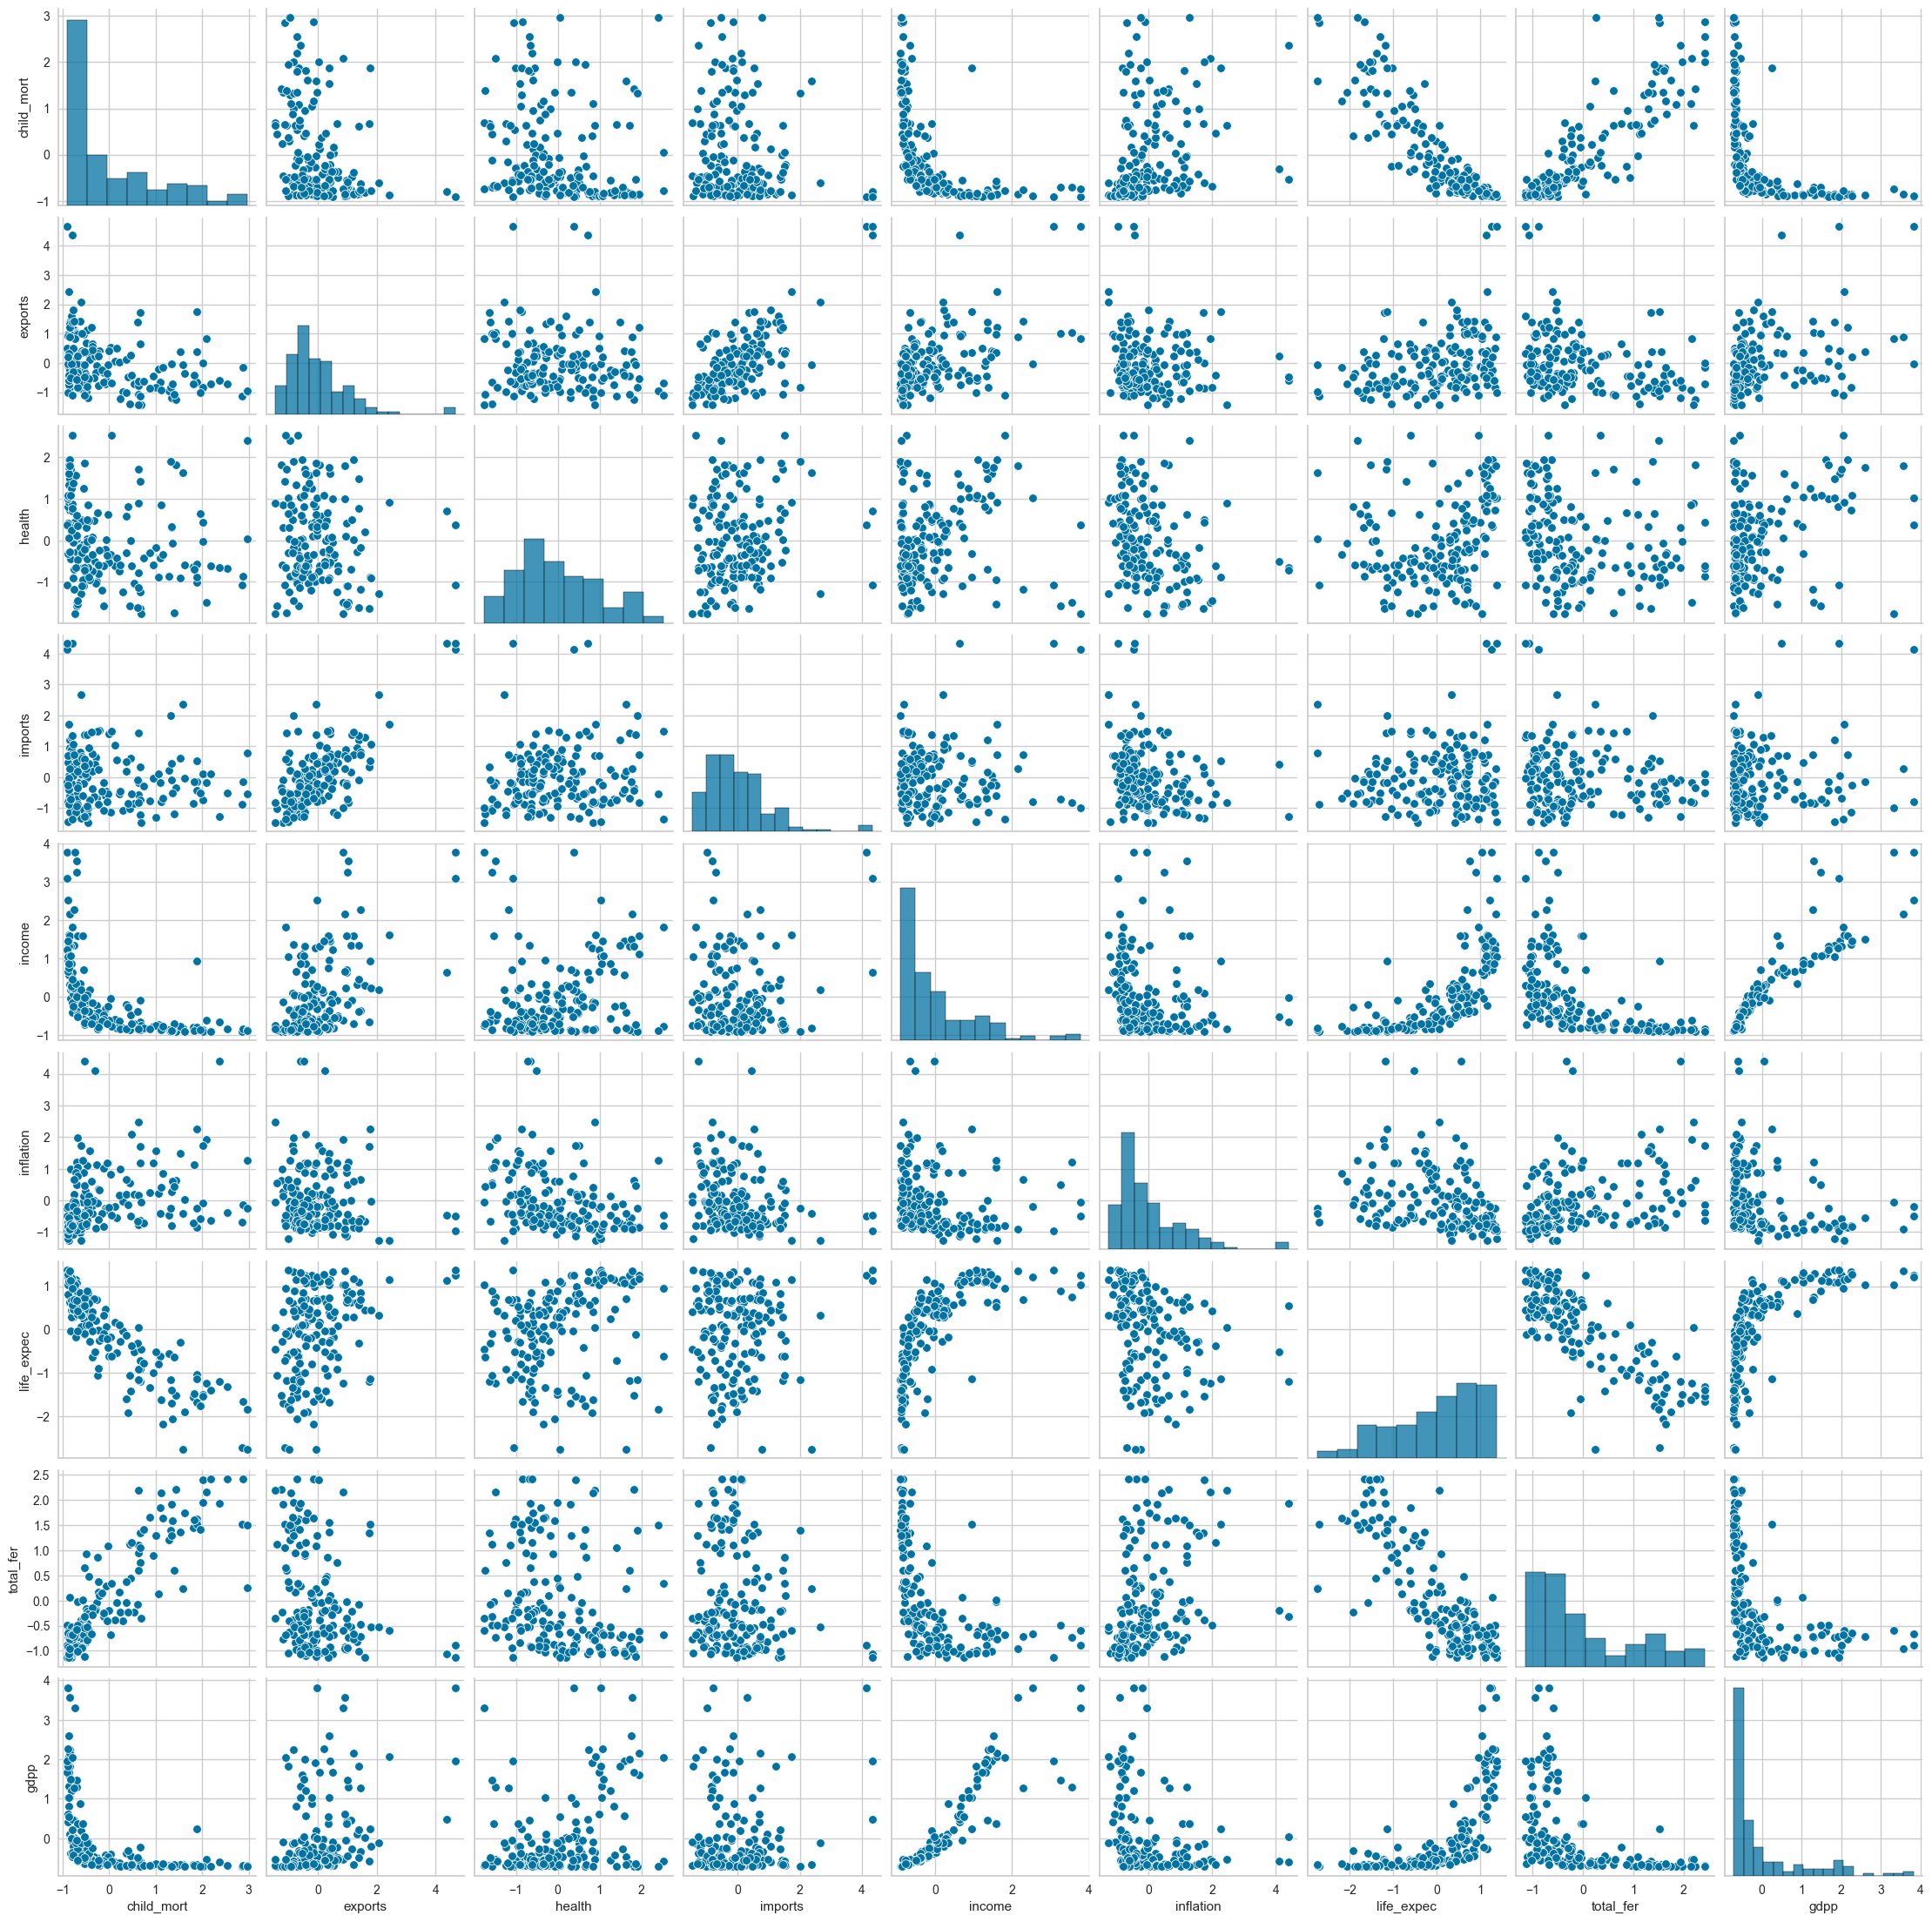

In [15]:
sns.pairplot(data_s)

### PCA

In [16]:
pca = PCA(n_components=9)

In [17]:
pca.fit(data_s)

PCA(n_components=9)

In [18]:
pca.explained_variance_

array([4.27823733, 1.53037471, 1.21746675, 0.96172041, 0.61715173,
       0.18503179, 0.12391253, 0.08721568, 0.05310593])

In [19]:
pca.explained_variance_ratio_.cumsum()

array([0.47251324, 0.64153666, 0.77600072, 0.88221867, 0.95038048,
       0.97081645, 0.98450207, 0.99413467, 1.        ])

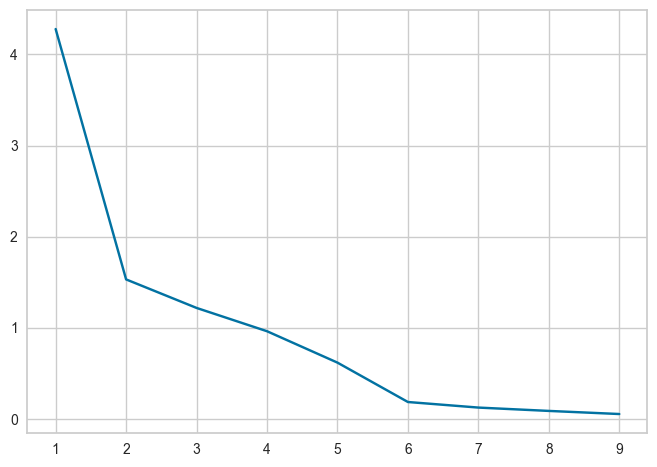

In [20]:
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [21]:
# Lets go with 4 PC's
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_s)

In [22]:
data_pca = pd.DataFrame(data_pca,columns=range(1,5))

In [23]:
data_pca

1         2         3         4
0   -3.025658 -0.003637  0.869758  0.963519
1    0.452028 -0.513954  0.256504 -1.274491
2   -0.375785 -0.464859 -1.530583 -0.697769
3   -3.166567  1.602272 -1.772517  1.270583
4    1.107019  0.231739  0.207497 -0.860967
..        ...       ...       ...       ...
162 -0.835382  0.705868  0.372782 -0.706413
163 -0.764815 -1.346997 -3.566874  0.136890
164  0.436635  1.595775 -0.045564 -1.100618
165 -2.091453 -0.180723 -1.421573  0.234704
166 -3.019891  0.387956 -0.256735  0.953016

[167 rows x 4 columns]

### K-Means Clustering

In [24]:
kelbow = KElbowVisualizer(KMeans(),k=9)

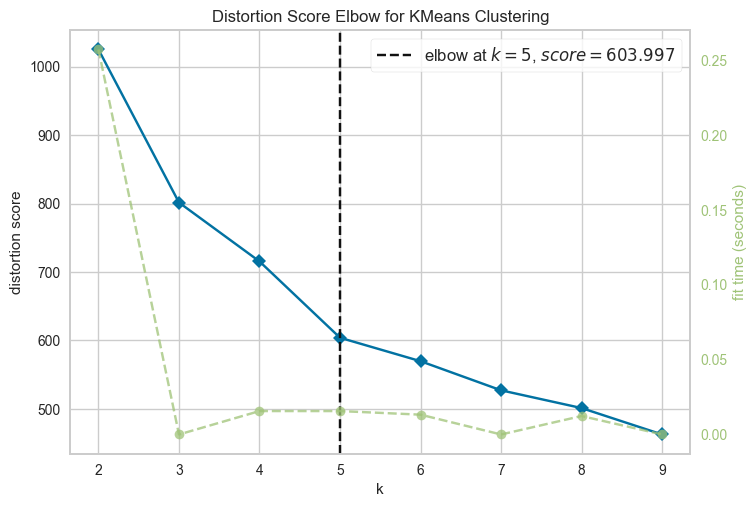

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
kelbow.fit(data_s)
kelbow.show()

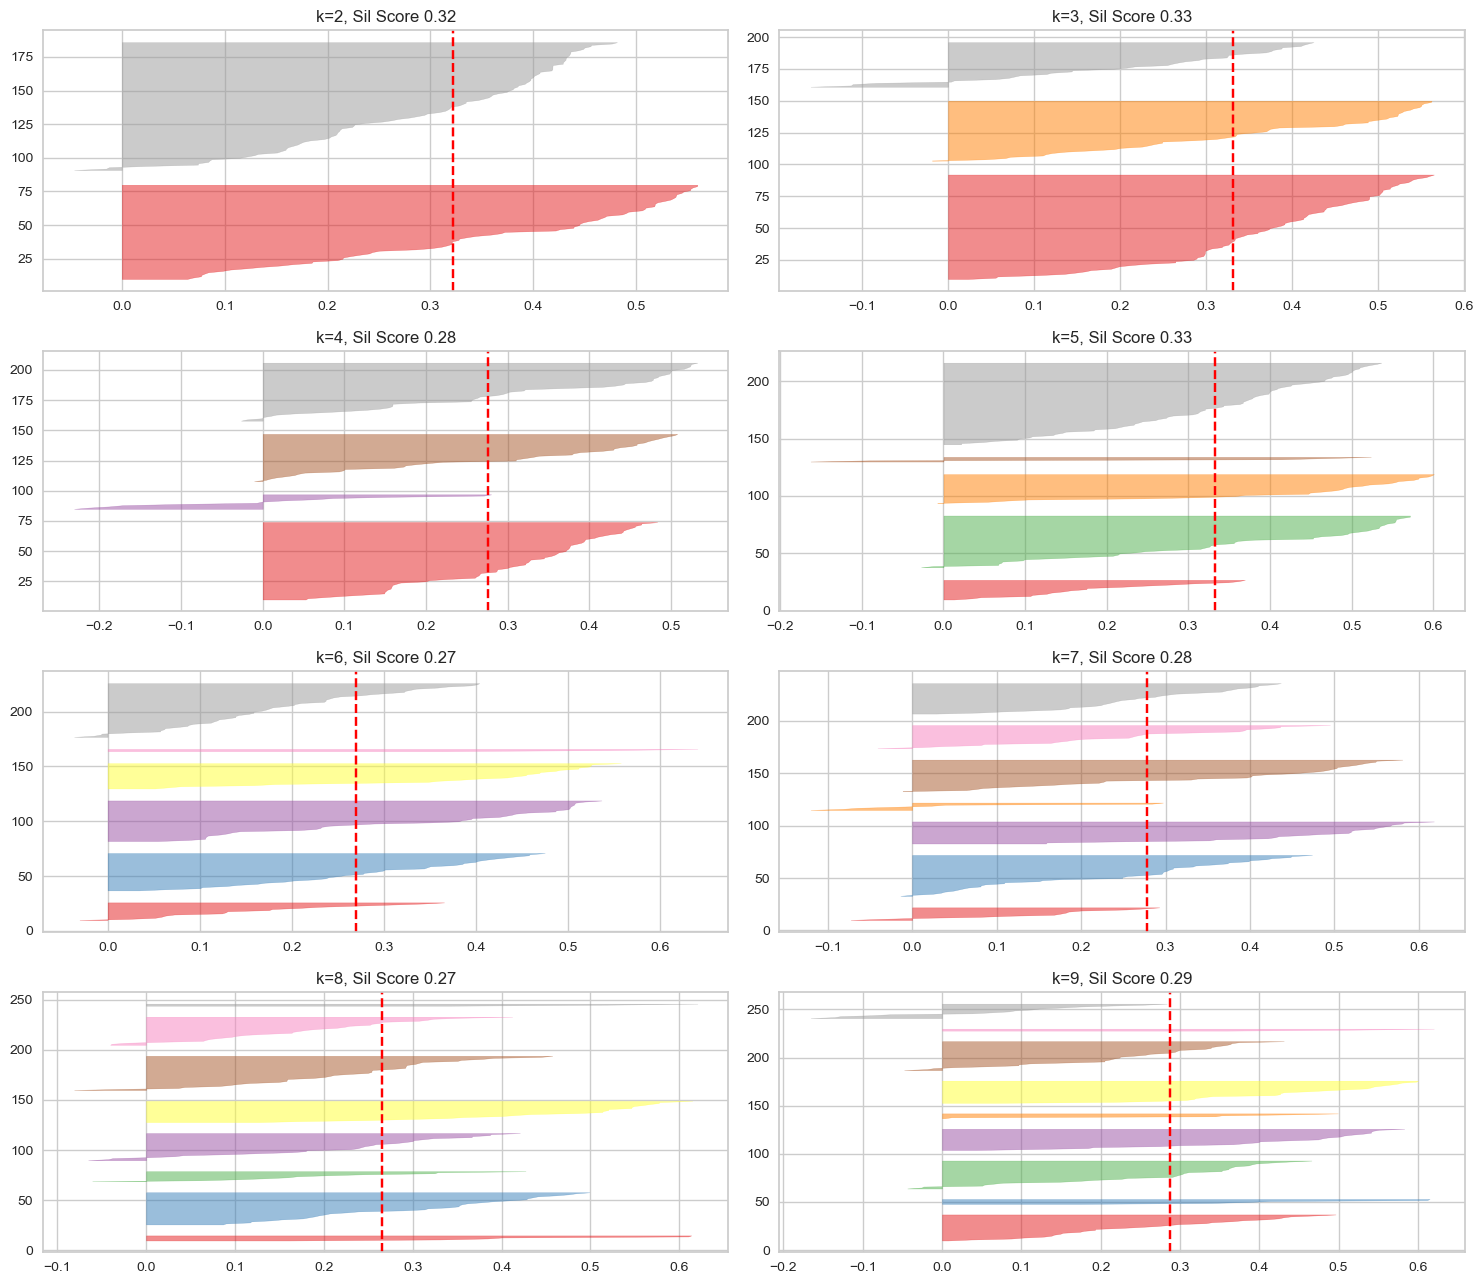

In [67]:
t=1
plt.figure(figsize=(15,13))
for i in [2,3,4,5,6,7,8,9]:
    plt.subplot(4,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title(f'k={i}, Sil Score {round(sil_viz.silhouette_score_,2)}')
    t+=1
plt.tight_layout()
plt.show()

In [69]:
# Lets go with k=3

In [26]:
k_means = KMeans(n_clusters=3)

In [27]:
pred_kmeans  = k_means.fit_predict(data_pca)

In [28]:
pred_kmeans

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [29]:
clusters = k_means.cluster_centers_

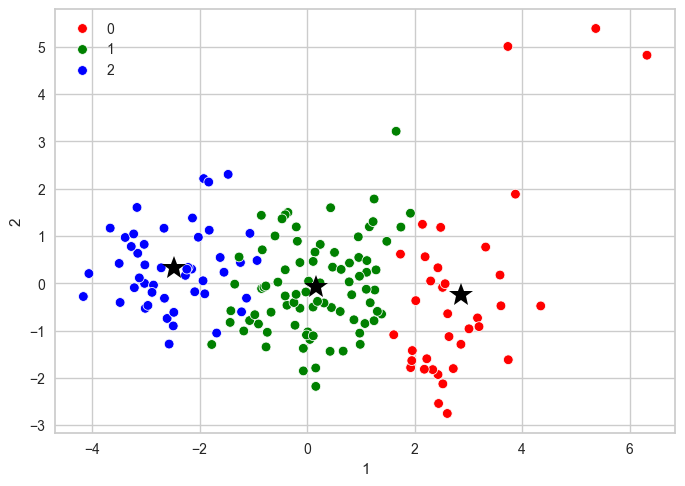

In [30]:
sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=pred_kmeans,
               palette=['red','green','blue'])
for i in range(3):
    plt.plot(clusters[i][0],clusters[i][1],marker='*',ms=18,color='black')

### Aggloromative Clustering

In [31]:
data_pca.shape

(167, 4)

In [32]:
dist_mat = euclidean_distances(data_pca)
actual_dist = dist_mat[np.triu_indices(167,k=1)]

In [33]:
def draw_dendrogram(link_method):

    link_mat = linkage(data_pca,method=link_method)
    coeff,_ = cophenet(link_mat,actual_dist)
    plt.title(f'Dendrogram: method={link_method}, Coeff={round(coeff,2)}')
    dendrogram(link_mat)
    plt.show()

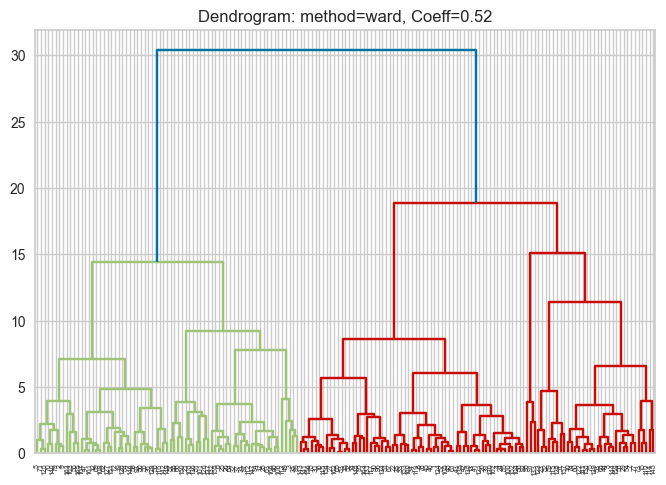

In [34]:
draw_dendrogram('ward')

In [35]:
# Model 1: method: 'complete' , k=3
# Model 2: method: 'ward', k=2

In [36]:
model1 = AgglomerativeClustering(n_clusters=2,linkage='ward')
pred = model1.fit_predict(data_pca)
print(silhouette_score(data_pca,pred))

0.3126115454512045


In [37]:
model2 = AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = model2.fit_predict(data_pca)
print(silhouette_score(data_pca,pred))

0.318705529556174


In [38]:
model_agglo = AgglomerativeClustering(n_clusters=3,linkage='complete')

In [39]:
pred_agglo = model_agglo.fit_predict(data_pca)

<Axes: xlabel='1', ylabel='2'>

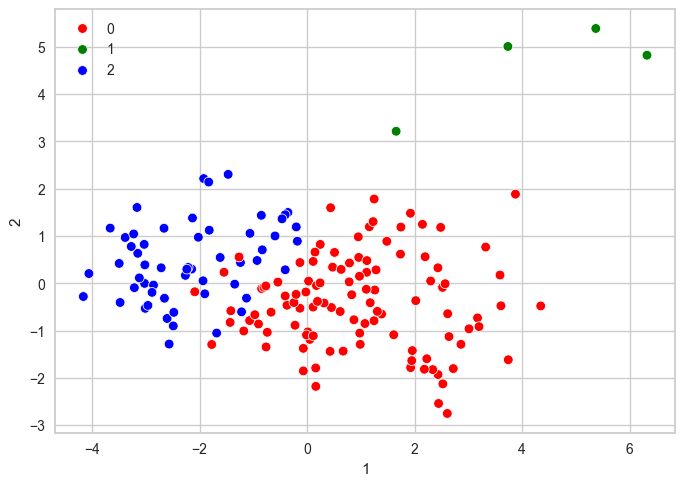

In [40]:
sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=pred_agglo,
               palette=['red','green','blue'])

### Final Model

<Axes: >

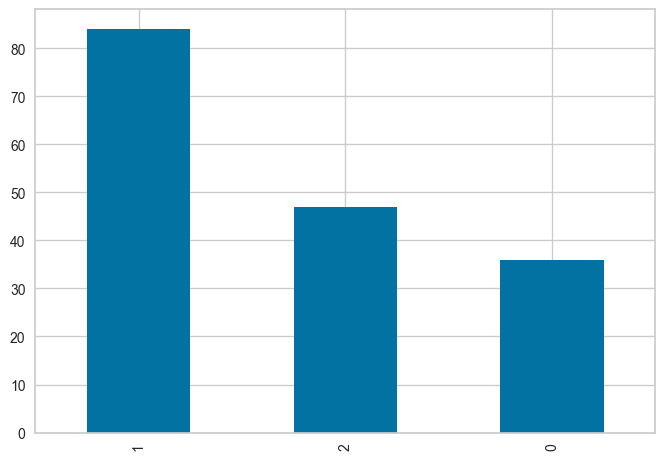

In [41]:
pd.Series(pred_kmeans).value_counts().plot(kind='bar')

<Axes: >

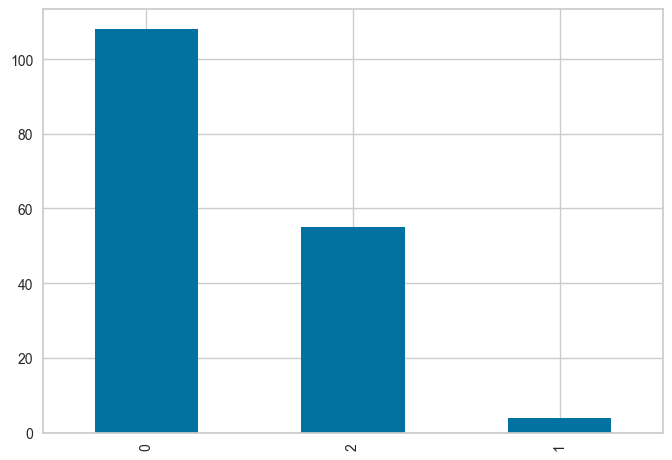

In [42]:
pd.Series(pred_agglo).value_counts().plot(kind='bar')

In [44]:
# Put the prediction from final model to the origional data

In [43]:
data['Lable'] = pred_kmeans

In [44]:
data

country  child_mort  exports  health  imports   income  \
0            Afghanistan        90.2     10.0    7.58     44.9   1610.0   
1                Albania        16.6     28.0    6.55     48.6   9930.0   
2                Algeria        27.3     38.4    4.17     31.4  12900.0   
3                 Angola       119.0     62.3    2.85     42.9   5900.0   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0   
..                   ...         ...      ...     ...      ...      ...   
162              Vanuatu        29.2     46.6    5.25     52.7   2950.0   
163            Venezuela        17.1     28.5    4.91     17.6  16500.0   
164              Vietnam        23.3     72.0    6.84     80.2   4490.0   
165                Yemen        56.3     30.0    5.18     34.4   4480.0   
166               Zambia        83.1     37.0    5.89     30.9   3280.0   

     inflation  life_expec  total_fer     gdpp  Lable  
0        9.440        56.2       5.82    553.0      2  
1        4.490        76.3       1.65   4090.0      1  
2       16.100        76.5       2.89   4460.0      1  
3       22.400        60.1       6.16   3530.0      2  
4        1.440        76.8       2.13  12200.0      1  
..         ...         ...        ...      ...    ...  
162      2.620        63.0       3.50   2970.0      1  
163     41.478        75.4       2.47  13500.0      1  
164     12.100        73.1       1.95   1310.0      1  
165     23.600        67.5       4.67   1310.0      2  
166     14.000        52.0       5.40   1460.0      2  

[167 rows x 11 columns]

### Business Interpretation

In [45]:
num_cols = data.select_dtypes(np.number).columns

In [46]:
data.groupby(by='Lable')[num_cols].mean()

child_mort    exports    health    imports        income  inflation  \
Lable                                                                        
0        5.005556  57.237778  8.693494  50.496111  44340.222222   2.695450   
1       21.927381  40.289160  6.194117  47.641381  12305.595238   7.570419   
2       91.659574  29.187647  6.388511  42.323404   3946.137872  10.689426   

       life_expec  total_fer          gdpp  Lable  
Lable                                              
0       80.106667   1.755733  41532.666667    0.0  
1       72.814286   2.307500   6486.452381    1.0  
2       59.521702   4.987813   1924.622128    2.0

In [49]:
# Lets call 0--> Developed, 1--> Underdevelop, 2--> developing

In [47]:
data['Lable'] = data['Lable'].map({0:'Developed',1:'Developing',2:'Underdeveloped'})

In [48]:
data

country  child_mort  exports  health  imports   income  \
0            Afghanistan        90.2     10.0    7.58     44.9   1610.0   
1                Albania        16.6     28.0    6.55     48.6   9930.0   
2                Algeria        27.3     38.4    4.17     31.4  12900.0   
3                 Angola       119.0     62.3    2.85     42.9   5900.0   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0   
..                   ...         ...      ...     ...      ...      ...   
162              Vanuatu        29.2     46.6    5.25     52.7   2950.0   
163            Venezuela        17.1     28.5    4.91     17.6  16500.0   
164              Vietnam        23.3     72.0    6.84     80.2   4490.0   
165                Yemen        56.3     30.0    5.18     34.4   4480.0   
166               Zambia        83.1     37.0    5.89     30.9   3280.0   

     inflation  life_expec  total_fer     gdpp           Lable  
0        9.440        56.2       5.82    553.0  Underdeveloped  
1        4.490        76.3       1.65   4090.0      Developing  
2       16.100        76.5       2.89   4460.0      Developing  
3       22.400        60.1       6.16   3530.0  Underdeveloped  
4        1.440        76.8       2.13  12200.0      Developing  
..         ...         ...        ...      ...             ...  
162      2.620        63.0       3.50   2970.0      Developing  
163     41.478        75.4       2.47  13500.0      Developing  
164     12.100        73.1       1.95   1310.0      Developing  
165     23.600        67.5       4.67   1310.0  Underdeveloped  
166     14.000        52.0       5.40   1460.0  Underdeveloped  

[167 rows x 11 columns]

In [49]:
# developed
data[data['Lable']=='Developed']['country']

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United

In [50]:
# developing
data[data['Lable']=='Developing']['country']

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 84, dtype: object

In [51]:
# Underdeveloping
data[data['Lable']=='Underdeveloped']['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

### WORLD MAP

In [52]:
fig = px.choropleth(data[['country','Lable']],
                    locationmode='country names',
                    locations='country',
                    color='Lable',
                    color_discrete_map={'Developed':'lightblue',
                                        'Underdeveloped':'red',
                                        'Developing':'lightgreen'})
fig.show()